In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [191]:
df = pd.read_csv('Data_test.csv',sep=";")

df.head(-10)

,ToAfirst(ns),X(pix),Y(pix),Size(Pix),ToTsum(ns),Global_Time(s),TDC_P_Edge(ns),ToT@ToAfirst,ToA@ToTmax,ToTmax
0,1.320876e+07,30.20,88.45,15,7400.0,0.000000,0.000000e+00,775.00,1.320878e+07,825.0
1,2.752278e+07,151.08,115.18,99,68050.0,0.000000,0.000000e+00,4000.00,2.752278e+07,4000.0
2,4.307598e+07,126.30,19.97,24,6900.0,0.000000,0.000000e+00,450.00,4.307602e+07,475.0
3,4.959443e+07,137.93,123.46,46,29200.0,0.000000,0.000000e+00,2250.00,4.959443e+07,2625.0
4,5.535522e+07,151.54,140.61,86,54775.0,0.000000,0.000000e+00,3875.00,5.535522e+07,3875.0
...,...,...,...,...,...,...,...,...,...,...
190725,8.998872e+11,116.96,134.53,50,44125.0,899.254999,8.964718e+11,4000.00 8,9.988718e+10,4100.0
190726,8.999032e+11,43.38,109.98,235,392750.0,899.254999,8.964718e+11,6950.00 8,9.990318e+10,7600.0
190727,8.999207e+11,123.87,150.52,142,141150.0,899.254999,8.964718e+11,5600.00 8,9.992069e+10,6675.0
190728,8.999212e+11,113.07,153.35,101,78050.0,899.254999,8.964718e+11,4925.00 8,9.992116e+10,4925.0


* **ToAfirst(ns)** = time stamp för mätningen eller tiden när partikel träffar detektor
* **x(pix)**,**y(pix)** = x,y pos på detektorn (ungefär 200 pixlar på 8 cm)
* **Size** = storlek på spottarna
* **ToTsum** = Intensiteten (time over threshold)

`df = df.astype({'ToAfirst(ns)':'float'})`

##### Create dataframe "df2" that contains the first column of the original dataset "df"

In [34]:
df2 = df.filter(['ToAfirst(ns)'], axis=1)

#### Set datapoint *n* to the difference between datapoint *n+1* and datapoint *n*

In [33]:
df2_diff=df2.diff().abs()

#### Only keep data wich differs less then 200 ns from the next datapoint and save that index to a list.

In [151]:
Index_labels_higher = df2_diff[df2_diff['ToAfirst(ns)'] < 200].index.tolist()

Index_labels_lower = [x-1 for x in Index_labels]

Index_labels = Index_labels_higher + Index_labels_lower

Index_labels.sort()

##### Skapa dataframe med datarader som uppfyller coincidence

In [154]:
df_coinc=df.query('index in @Index_labels')

In [155]:
df_coinc

,ToAfirst(ns),X(pix),Y(pix),Size(Pix),ToTsum(ns),Global_Time(s),TDC_P_Edge(ns),ToT@ToAfirst,ToA@ToTmax,ToTmax
5,5.618361e+07,90.47,175.81,233,331175.0,0.000000,0.000000e+00,7300.00,5.618361e+07,8925.0
6,5.618372e+07,96.73,166.03,16,3850.0,0.000000,0.000000e+00,400.00,5.618374e+07,475.0
17,1.151383e+08,128.22,129.93,27,24775.0,0.000000,0.000000e+00,2950.00,1.151383e+08,2950.0
18,1.151381e+08,109.86,132.27,105,114300.0,0.000000,0.000000e+00,5025.00,1.151381e+08,6800.0
62,3.474049e+08,118.12,127.04,65,61075.0,0.259012,0.000000e+00,4100.00,3.474049e+08,4400.0
...,...,...,...,...,...,...,...,...,...,...
190732,8.999261e+11,69.25,89.81,10,2950.0,899.254999,8.964718e+11,525.00 8,9.992610e+10,525.0
190735,8.999294e+11,83.83,102.51,277,394925.0,899.254999,8.964718e+11,7875.00 8,9.992936e+10,9225.0
190736,8.999294e+11,76.50,106.29,7,600.0,899.254999,8.964718e+11,225.00 8,9.992936e+10,225.0
190738,8.999314e+11,73.09,178.07,233,338700.0,899.254999,8.964718e+11,7425.00 8,9.993143e+10,7775.0


In [164]:
def dist_pix(x, y):
    return np.sqrt(x**2 + y**2)

In [169]:
X_pix = list(df_coinc['X(pix)'])
Y_pix = list(df_coinc['Y(pix)'])

In [173]:
Dist_lst = []

In [174]:
for i in range(len(X_pix)):
    Dist_lst.append(dist_pix(X_pix[i], Y_pix[i]))
    

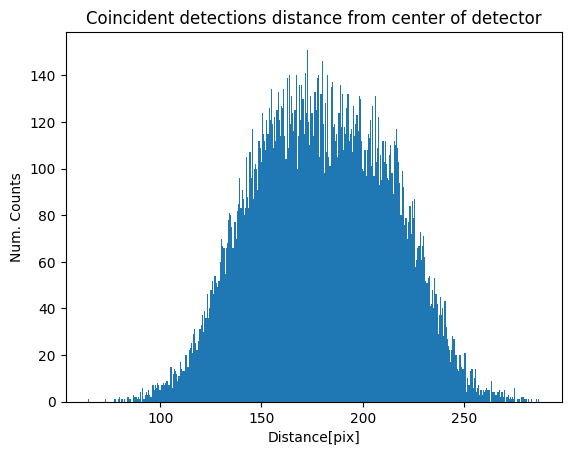

In [198]:

fig, ax = plt.subplots()
ax.hist(Dist_lst[35000:], bins=400)

ax.set(xlabel='Distance[pix]', ylabel='Num. Counts',
       title='Coincident detections distance from center of detector')
plt.show()